# PCA 3차원->2차원 차원 축소 실습
  - PCA : PCA 라이브러리
  - make_classification : 분류 데이터셋을 커스터마이징으로 생성
  - Axes3D : 3D 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D


## 3차원 데이터 생성
### make_classification 파라미터
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
-n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

In [ ]:
# 3차원 데이터 생성
X, y = make_classification(n_samples=300, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=0)
print(X.shape)  # 확인: (300, 3)


(300, 3)


## 3차원 데이터 시각화

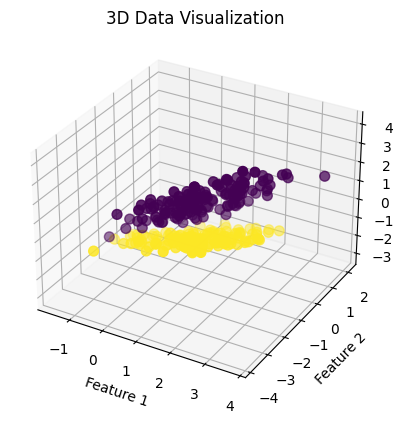

In [ ]:
# 3차원 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
plt.title("3D Data Visualization")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()


## PCA를 활용하여 2차원으로 축소

In [ ]:
# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# 주성분 설명력 확인
print(X_pca.shape)  # 확인: (300, 2)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

## 2차원 데이터 시각화

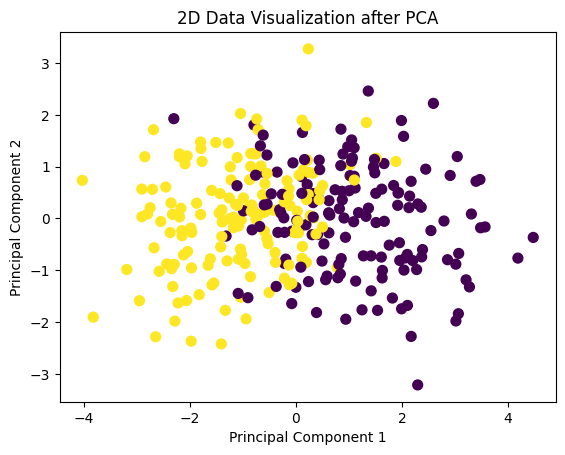

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("2D Data Visualization after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# PCA를 활용하여 wine 데이터 차원 축소

## 와인 데이터셋 설명
와인 데이터셋은 다양한 화학 성분 분석을 통해 이탈리아의 특정 지역에서 생산된 세 종류의 와인을 분류하는 데 사용. UCI 머신러닝 리포지토리에서 제공.

와인 데이터셋의 주요 특징:
  - 샘플 수: 178개 와인 샘플
  - 특징 수: 13개 화학적 특성
  - 클래스 수: 3개 와인 종류
각 샘플에 포함된 13개 화학적 특성:
  - Alcohol: 알코올 함량
  - Malic acid: 사과산 함량
  - Ash: 재 함량
  - Alcalinity of ash: 재의 알칼리도
  - Magnesium: 마그네슘 함량
  - Total phenols: 총 페놀 함량
  - Flavanoids: 플라보노이드 함량
  - Nonflavanoid phenols: 비플라보노이드 페놀 함량
  - Proanthocyanins: 프로안토시아닌 함량
  - Color intensity: 색상 강도
  - Hue: 색조
  - OD280/OD315 of diluted wines: 희석 와인의 OD280/OD315 비율
  - Proline: 프롤린 함량
  
데이터셋의 구조:
  - 데이터: 13개의 특성으로 이루어진 178개의 샘플
  - 라벨: 3개의 클래스 (각각 0, 1, 2로 표시됨)

## 1.필요 모듈 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd


## 1.데이터 로드 및 전처리

In [ ]:
# 데이터 로드
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# 데이터프레임으로 변환
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [ ]:
# 데이터셋 정보 출력
print("Feature names:", feature_names)
print("Target names:", target_names)
print("Data shape:", X.shape)
print("First 5 rows of the dataset:")
print(df.head())

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Data shape: (178, 13)
First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28     

## 2.데이터 스케일링

In [ ]:
# StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.PCA 적용

In [ ]:
# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## 4.PCA 최적화

### 주성분 설명력 확인
- 몇개의 축을 설정할 것인지 확인

In [ ]:
# 주성분의 설명력 확인
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(explained_variance)
print(cumulative_variance)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


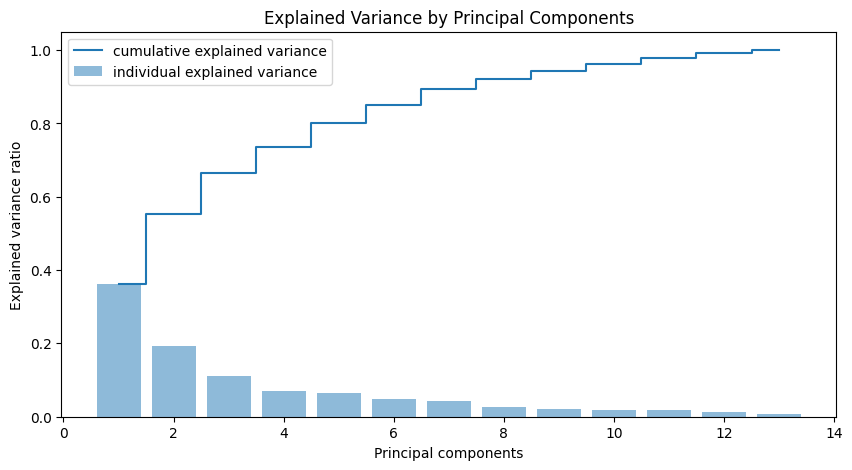

In [ ]:
# 설명된 분산 비율 및 누적 설명된 분산 비율 시각화
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title("Explained Variance by Principal Components")
plt.show()

In [ ]:
# 최적의 주성분 수 선택 (설명된 분산이 80%를 넘는 주성분의 수)
optimal_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 5


### 최적화된 PCA를 활용하여 2d 시각화 진행

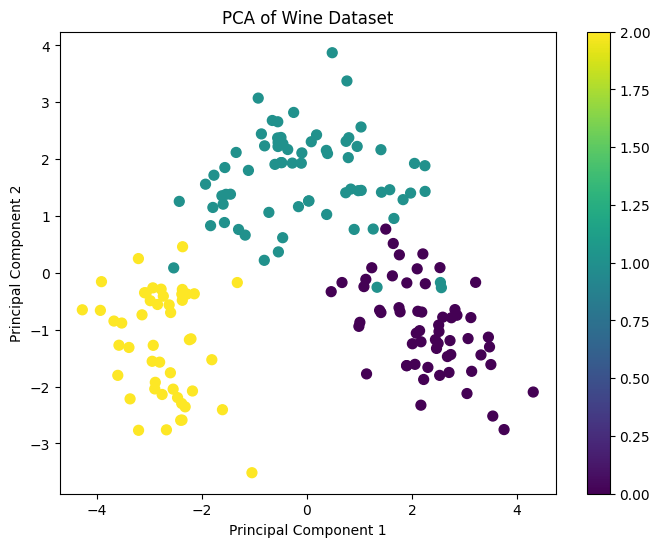

In [ ]:
# 최적의 주성분 수로 PCA 적용
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# 2D 시각화 (첫 두 개의 주성분만 사용)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar()
plt.show()
